$Question \quad 1$


In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

In [13]:
# Path to the dataset
file_path = 's1_statistical_methods_for_dis/datasets/ps1.pkl'

# Load the dataset
with open(file_path, 'rb') as file:
    dataset = pickle.load(file)

In [14]:
# Convert to DataFrame if it's not already
if not isinstance(dataset, pd.DataFrame):
    dataset = pd.DataFrame(dataset)

In [15]:
dataset

,vx,vy,vz,R2,p
0,-0.129486,-0.378220,-1.303648,0.159817,1.462786
1,0.855369,0.378654,2.219246,0.875035,3.138316
2,-0.391171,0.782003,-1.747694,0.764544,0.564914
3,-0.533835,1.830559,-1.869053,3.635927,1.814512
4,-1.001277,-0.443638,-6.325631,1.199371,0.855995
...,...,...,...,...,...
4995,-0.767874,-0.409239,8.709525,0.757107,1.718384
4996,-0.307080,-0.407104,2.755963,0.260032,1.493122
4997,1.212534,-0.030045,-10.432455,1.471140,1.019734
4998,0.224905,-0.178124,10.580369,0.082310,0.102227


<Figure size 1200x1000 with 0 Axes>

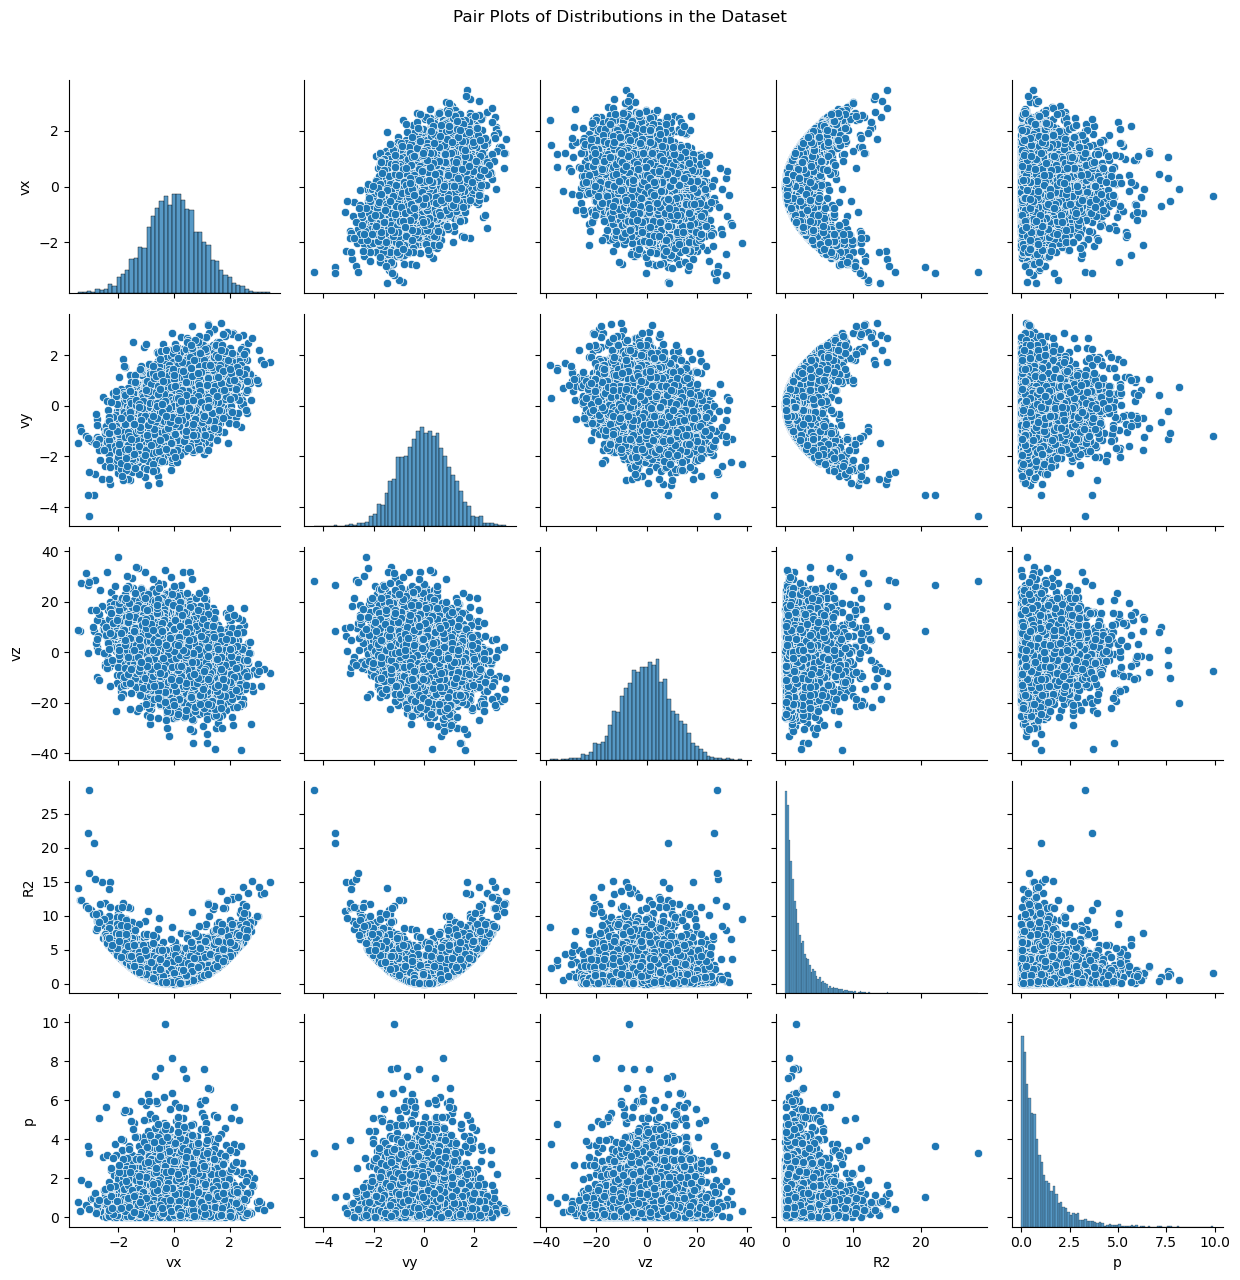

In [16]:
plt.figure(figsize=(12, 10))
sns.pairplot(dataset)
plt.suptitle("Pair Plots of Distributions in the Dataset", y=1.02)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

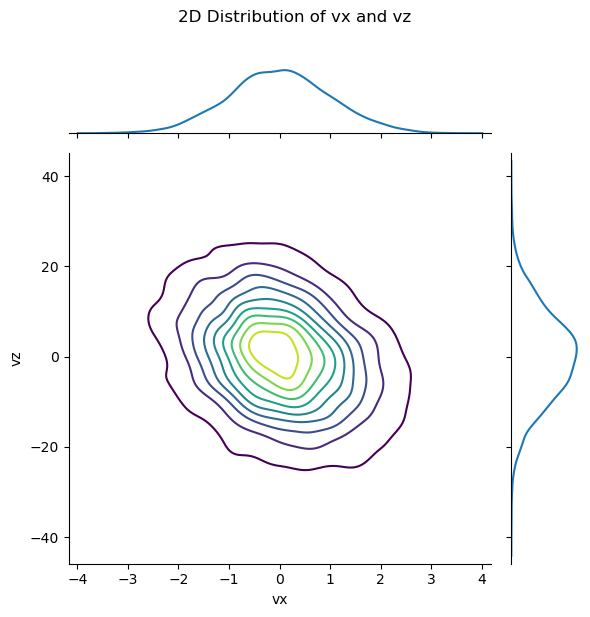

In [17]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='vx', y='vz', data=dataset, kind='kde', cmap='viridis')
plt.suptitle("2D Distribution of vx and vz", y=1.02)
plt.tight_layout()
plt.show()

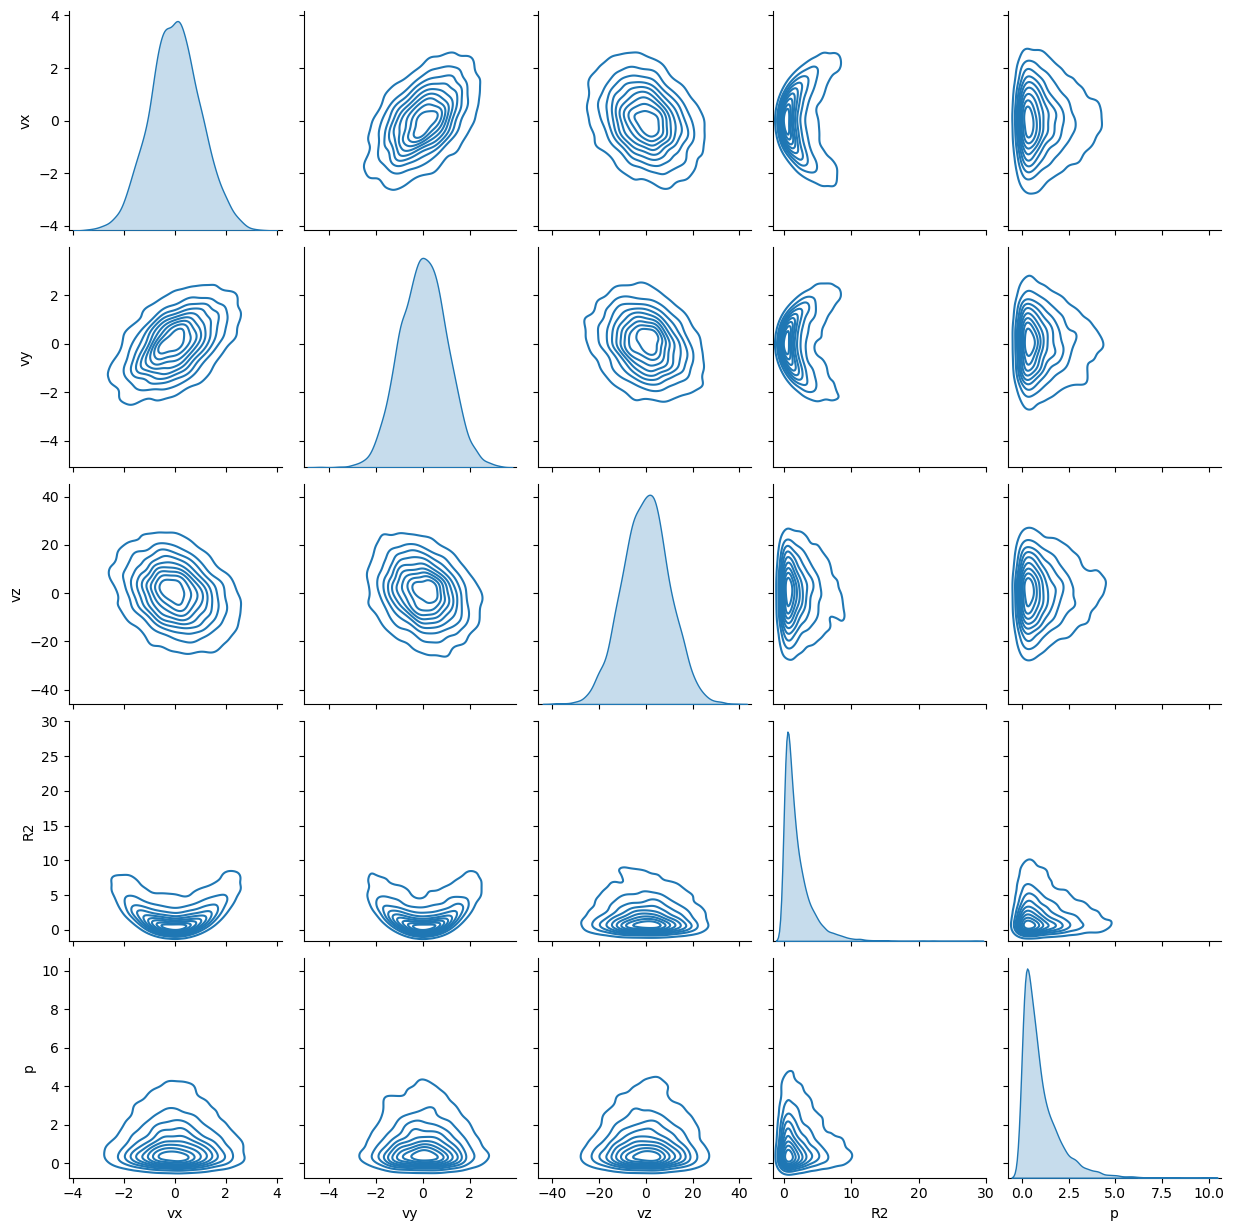

In [19]:
sns.pairplot(dataset, kind="kde")

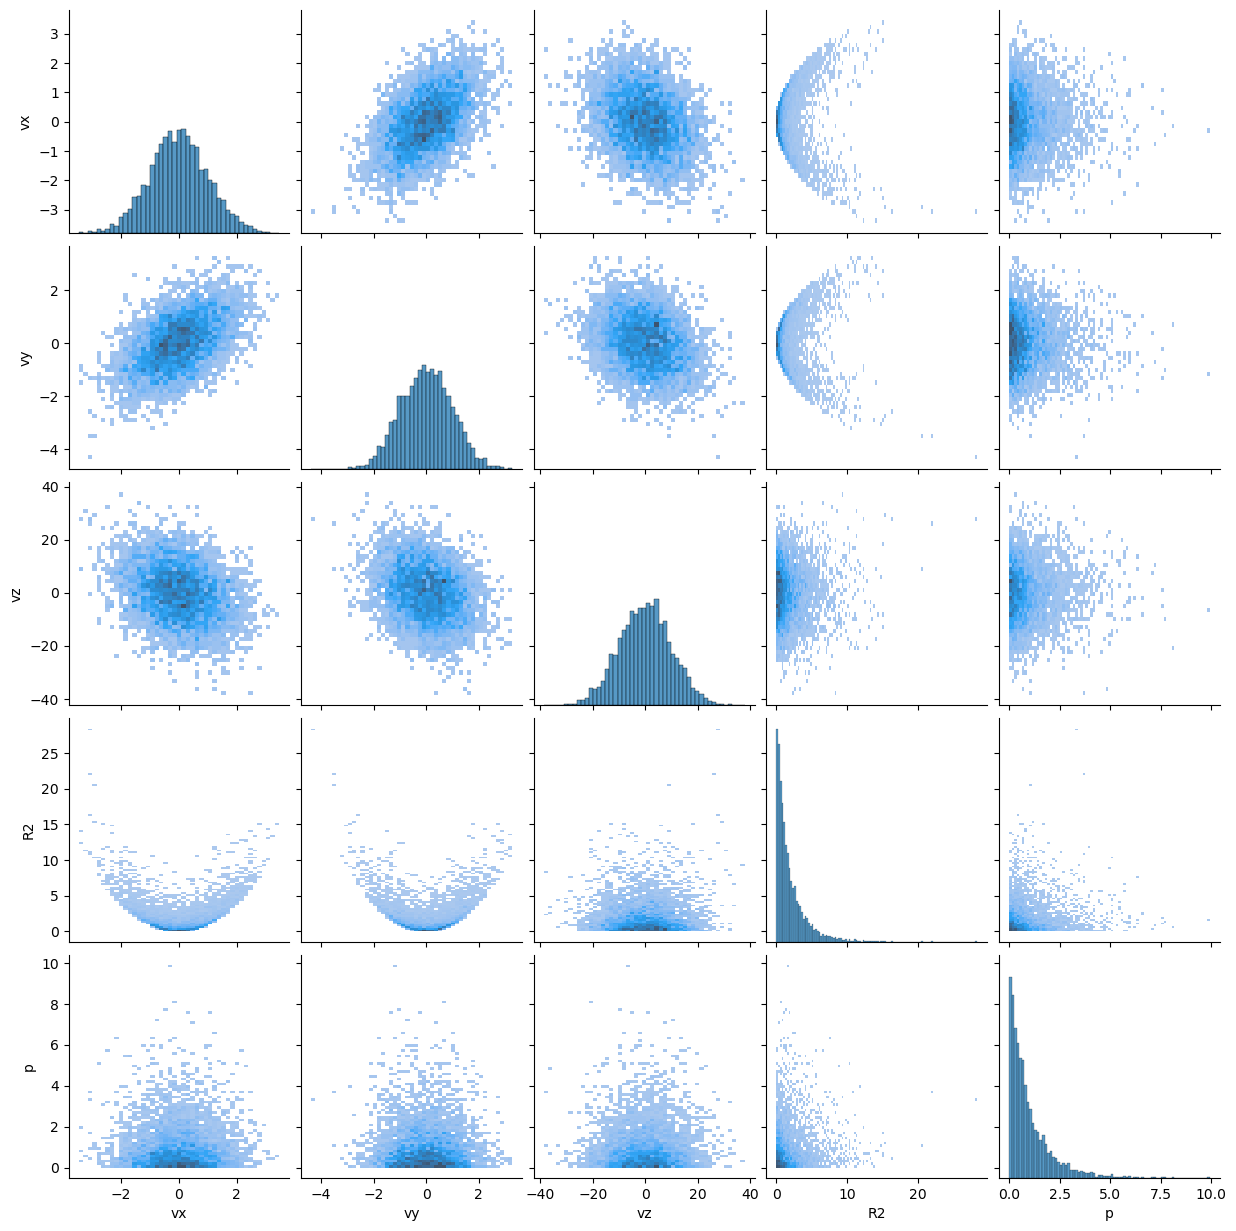

In [20]:
sns.pairplot(dataset,kind="hist")

Correlation Matrix:
          vx        vy        vz        R2         p
vx  1.000000  0.499943 -0.283132  0.001504 -0.001291
vy  0.499943  1.000000 -0.274027 -0.001331 -0.024314
vz -0.283132 -0.274027  1.000000  0.008939  0.015736
R2  0.001504 -0.001331  0.008939  1.000000  0.002401
p  -0.001291 -0.024314  0.015736  0.002401  1.000000
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.

Covariance Matrix:
          vx        vy          vz        R2         p
vx  1.002608  0.493081   -2.852446  0.003324 -0.001334
vy  0.493081  0.970208   -2.715740 -0.002893 -0.024699
vz -2.852446 -2.715740  101.233585  0.198513  0.163291
R2  0.003324 -0.002893    0.198513  4.871490  0.005466
p  -0.001334 -0.024699    0.163291  0.005466  1.063632


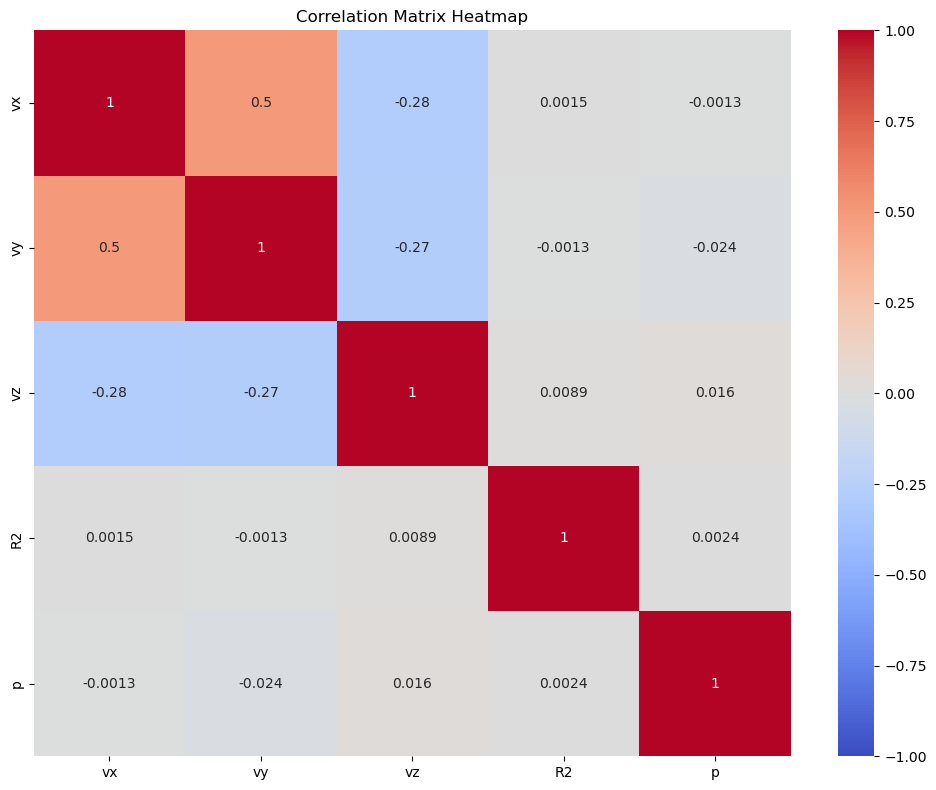

In [7]:
# Correlation matrix
corr_matrix = dataset.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Covariance matrix
cov_matrix = dataset.cov()
print("\nCovariance Matrix:")
print(cov_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

$ Question \quad 2$

The average deviation from the mean, rather than the sqquared deviation is used because 

$$\begin{align}
&\sum_{i}\frac {E(X_i-\bar{X})}{n}\\

&=\frac{\sum_{i}E(X_i-\bar{X})}{n}\\
&=\frac{E(\sum_{i}X_i-\bar{X})}{n}\\
&=\frac{E(n\bar{x}-n\bar{x})}{n}\\
&=0\\

\end{align}$$

The reason that we don't use absolute is because the non-differential property at the origin.

$ Question \quad 3$

$Part \quad a$

We will first define the Monty-Hall problem

In [22]:
def monty_hall_game(switch):
    doors=[0,0,1] #where 1 represent the car's position
    random.shuffle(doors)

    #player's initial choice
    initial_choice = random.randint(0, 2)

    #the host will then open an empty door
    remaining_doors=[i for i in range(3) if i != initial_choice and doors[i] == 0]
    opened_door = random.choice(remaining_doors)

    if switch:
        final_choice=[i for i in range(3) if i!=initial_choice and i!=opened_door][0]
    else:
        final_choice=initial_choice
    return doors[final_choice]==1




In [23]:
def run_simulation(nums):
    switch_wins = sum(monty_hall_game(switch=True) for _ in range(nums))
    stick_wins = sum(monty_hall_game(switch=False) for _ in range(nums))
    switch_prob = switch_wins / nums
    stick_prob = stick_wins / nums
    
    return switch_prob, stick_prob

In [24]:
# Run the simulation
num_games = 1000000
switch_prob, stick_prob = run_simulation(num_games)

print(f"Probability of winning if switching: {switch_prob:.4f}")
print(f"Probability of winning if sticking: {stick_prob:.4f}")

Probability of winning if switching: 0.6672
Probability of winning if sticking: 0.3341


$Part \quad b$

The probability of winning if sticking is $1/100$, and the probability of winning if switching is $1-1/100$

$Part \quad c$

The probability of winning if sticking is 
$$ \frac{1}{N}$$

The proabbility of winning if switching is 
$$\frac{N-1}{N}$$


$Part \quad d$ 

$$
\begin{align}
&P(swtiching \quad to \quad win)\\
&=P(wrong\quad initial\quad choice)*\\
& P(correct\quad choice\quad after\quad p\quad doors|wrong \quad initial \quad choice)+\\
& P(correct\quad initial\quad choice) *\\
&P(correct\quad choice\quad after\quad p\quad doors|correct \quad initial \quad choice)\\
&=\frac{N-1}{N} * \frac{1}{N-p-1}+0\\
\end{align}
$$

$Part \quad e$

$$
\begin{align}
&P(swtiching \quad to \quad win)\\
&=P(wrong\quad initial\quad choice)*\\
& P(correct\quad choice\quad after\quad p\quad doors|wrong \quad initial \quad choice)+\\
& P(correct\quad initial\quad choice) *\\
&P(correct\quad choice\quad after\quad p\quad doors|correct \quad initial \quad choice)\\
&=[\frac{\binom{N-1}{k}}{\binom{N}{k}} \times \frac{k}{N-P-1} + \frac{\binom{N-1}{k-1}}{\binom{N}{k}} \times \frac{k-1}{N-P-1}]\\
&=\frac{k(N-1)}{N(N-p-1)}
\end{align}
$$

$Part \quad f$

$$Question \quad 4$$

$$
\begin{align}
&\sum_{k=0}^{n} \binom{n}{k} p^k (1-p)^k\\
&=((1-p)+p)^n\\
&=1\\
\end{align}
$$

$$ Question \quad 5$$

The efficiency of the system would be (We hit the targets every time we shoot)


$$
\begin{align}
P&=0.95^3\\
&=0.857\\
\end{align}
$$

Having more attempts would not significantly improve the result as 
$$
\begin{align}
P&=0.05^3*0.95\\
&=0.00012
\end{align}
$$

$$Question \quad 6$$

The sum of Poisson distribution is also Poisson distribution.

$$
\begin{align}
P(Z=z)&=P(X+Y=z)\\
&=\sum_{l}P(X=l)P(Y=z-l)\\
&=\sum_{l} \exp^{-\lambda_x} \exp^{-\lambda_y} \lambda_x^l \lambda_y^{z-l}/l!(z-l!)\\
&=\exp^{-\lambda_x-\lambda_y} (\lambda_x+\lambda_y)/z!
\end{align}
$$

By the above formulation, the expected value is $\lambda_x +\lambda_y$